<a href="https://colab.research.google.com/github/Shiva9959/DEVTERN_INTERNSHIP/blob/main/shiva_Devtern_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
news_data= pd.read_csv("/content/news.csv",nrows=1500)
news_data.tail(10)

,Unnamed: 0,title,text,label
1490,6431,The Media Ignores the Good News On Climate Change,"By Rmuse on Thu, Oct 27th, 2016 at 10:36 am To...",FAKE
1491,3048,The NRA-ification of the Republican Party,"The National Rifle Association, the all-powerf...",REAL
1492,2697,"University of Missouri, please immediately fir...",To watch the video of photographer Tim Tai get...,REAL
1493,4748,Trump &amp; Clinton Were Very Convincing...on ...,Let's pretend for a moment that the biggest he...,REAL
1494,9264,"Meteor, space junk, rocket? Mysterious flash h...","Meteor, space junk, rocket? Mysterious flash h...",FAKE
1495,597,Democrats see map and math working to their ad...,The Senate map is the Democrats’ friend in the...,REAL
1496,828,Hillary Clinton doesn't need to choose between...,There's a creeping anxiety in the halls of som...,REAL
1497,2951,"Airstrikes Move To Syria, Target More Than Jus...","Airstrikes Move To Syria, Target More Than Jus...",REAL
1498,416,Top US lawmakers strike deal to fast-track tra...,Top congressional Republicans and Democrats sa...,REAL
1499,5317,"Leftist Hypocrisy On “Peace, Love, And Equalit...",Pinterest \nRobert Gehl reports that of all th...,FAKE


In [ ]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1500 non-null   int64 
 1   title       1500 non-null   object
 2   text        1500 non-null   object
 3   label       1500 non-null   object
dtypes: int64(1), object(3)
memory usage: 47.0+ KB


In [ ]:
news_data.shape

(1500, 4)

In [ ]:
news_data["label"].value_counts()

label
FAKE    754
REAL    746
Name: count, dtype: int64

In [ ]:
labels= news_data.label
labels.tail(10)

1490    FAKE
1491    REAL
1492    REAL
1493    REAL
1494    FAKE
1495    REAL
1496    REAL
1497    REAL
1498    REAL
1499    FAKE
Name: label, dtype: object

In [ ]:
#First, we split the dataset into train & test samples:
x_train, x_test, y_train, y_test= train_test_split(news_data["text"], labels, test_size= 0.2, random_state= 7)

In [ ]:
#Then we’ll initialize TfidfVectorizer with English stop words
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=vectorizer.fit_transform(x_train)
tfidf_test=vectorizer.transform(x_test)

In [ ]:
#Create a PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)

In [ ]:
#Create a confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[152,  17],
       [ 10, 121]])

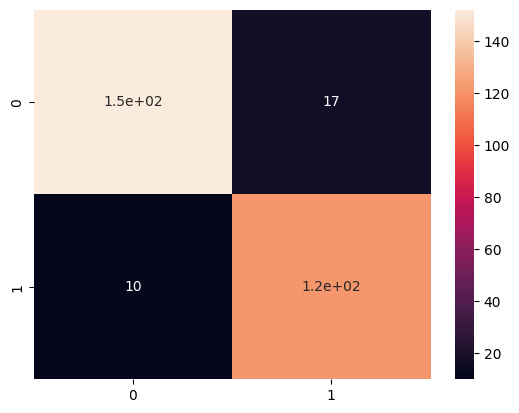

In [ ]:
#Visualize the confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

91.0

In [ ]:
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.94      0.90      0.92       169
        REAL       0.88      0.92      0.90       131

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

